# Project

The aim of the project was to answer questions related to Stackoverflow's survey. A blog where the questions are discussed can be found here:
https://medium.com/@alicja.roelofsen/what-makes-a-developer-f1d8f82ebc19

### Gather

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, fbeta_score
import seaborn as sns
%matplotlib inline

In [2]:
df_original = pd.read_csv('./survey_results_public.csv')

### Pre-assessment

Please note that large part of the assesment has been done on the downloaded survay schema, in excel, where it was easier to scroll through the large number od columns.

In [3]:
df_original.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Business understanding

The aim of the following analysis is to answer the following questions:
1. Is there correlation between the education of responders (developers, analysts) and the level of education of their parents?
2. Do people who choose a technical career path (developers, anlysts) have certain personal traits or preferences in common?
3. Based on person's characteristics, can you predict if they enjoyed the survey?

### Assessment of columns needed for Question 1

In [4]:
df_original[['HighestEducationParents', 'FormalEducation']].head()

,HighestEducationParents,FormalEducation
0,High school,Secondary school
1,A master's degree,Some college/university study without earning ...
2,A professional degree,Bachelor's degree
3,A doctoral degree,Doctoral degree
4,NaN,Master's degree


In [5]:
df_original[['HighestEducationParents', 'FormalEducation']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Data columns (total 2 columns):
HighestEducationParents    12853 non-null object
FormalEducation            19102 non-null object
dtypes: object(2)
memory usage: 298.5+ KB


In [6]:
df_original['HighestEducationParents'].value_counts()

A bachelor's degree                                    3671
A master's degree                                      2825
High school                                            2233
Some college/university study, no bachelor's degree    1718
A doctoral degree                                       748
A professional degree                                   570
Primary/elementary school                               516
I don't know/not sure                                   278
I prefer not to answer                                  224
No education                                             70
Name: HighestEducationParents, dtype: int64

In [7]:
df_original['FormalEducation'].value_counts()

Bachelor's degree                                                    8099
Master's degree                                                      4143
Some college/university study without earning a bachelor's degree    2869
Secondary school                                                     2227
Doctoral degree                                                       551
I prefer not to answer                                                409
Primary/elementary school                                             404
Professional degree                                                   255
I never completed any formal education                                145
Name: FormalEducation, dtype: int64

#### Conclusion
Column HighestEducationParents has many null values, will need to account for that.
Cathegories in the two columns differ, and are too granular, will need to clean this.

### Assessment of columns needed for Question 2

In [8]:
df_original[['ProblemSolving', 'BuildingThings', 'LearningNewTech', 
                                'UnderstandComputers', 'SeriousWork', 'KinshipDevelopers', 
                                'ChallengeMyself', 'CompetePeers', 'ChangeWorld']].head()

,ProblemSolving,BuildingThings,LearningNewTech,UnderstandComputers,SeriousWork,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld
0,Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Agree
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Strongly agree,Strongly agree,Strongly agree,Disagree,Agree,Somewhat agree,Agree,Disagree,Agree
3,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_original[['ProblemSolving', 'BuildingThings', 'LearningNewTech', 
                                'UnderstandComputers', 'SeriousWork', 'KinshipDevelopers', 
                                'ChallengeMyself', 'CompetePeers', 'ChangeWorld']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Data columns (total 9 columns):
ProblemSolving         12220 non-null object
BuildingThings         12201 non-null object
LearningNewTech        12216 non-null object
UnderstandComputers    12135 non-null object
SeriousWork            12132 non-null object
KinshipDevelopers      11980 non-null object
ChallengeMyself        12089 non-null object
CompetePeers           12034 non-null object
ChangeWorld            12077 non-null object
dtypes: object(9)
memory usage: 1.3+ MB


In [10]:
df_original['ProblemSolving'].value_counts()

Strongly agree       6941
Agree                4438
Somewhat agree        740
Disagree               73
Strongly disagree      28
Name: ProblemSolving, dtype: int64

#### Conclusion
All the columns have many null values, will need to account for that. No other cleaning necessary.

### Assessment of columns needed for Question 3

In [11]:
df_original[['QuestionsInteresting', 'Professional', 'ProgramHobby', 'Country', 'EmploymentStatus', 'FormalEducation', 
               'CareerSatisfaction', 'StackOverflowSatisfaction', 'StackOverflowCommunity', 
               'StackOverflowHelpful', 'StackOverflowBetter', 'Gender', 'Race']].head()

,QuestionsInteresting,Professional,ProgramHobby,Country,EmploymentStatus,FormalEducation,CareerSatisfaction,StackOverflowSatisfaction,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,Gender,Race
0,Strongly agree,Student,"Yes, both",United States,"Not employed, and not looking for work",Secondary school,NaN,9.0,Strongly agree,Agree,Strongly agree,Male,White or of European descent
1,Somewhat agree,Student,"Yes, both",United Kingdom,Employed part-time,Some college/university study without earning ...,NaN,8.0,Strongly agree,Agree,Strongly agree,Male,White or of European descent
2,Agree,Professional developer,"Yes, both",United Kingdom,Employed full-time,Bachelor's degree,8.0,8.0,Strongly agree,Agree,Agree,Male,White or of European descent
3,Agree,Professional non-developer who sometimes write...,"Yes, both",United States,Employed full-time,Doctoral degree,6.0,10.0,Strongly agree,Strongly agree,Agree,Male,White or of European descent
4,NaN,Professional developer,"Yes, I program as a hobby",Switzerland,Employed full-time,Master's degree,6.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_original[['QuestionsInteresting', 'Professional', 'ProgramHobby', 'Country', 'EmploymentStatus', 'FormalEducation', 
               'CareerSatisfaction', 'StackOverflowSatisfaction', 'StackOverflowCommunity', 
               'StackOverflowHelpful', 'StackOverflowBetter', 'Gender', 'Race']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Data columns (total 13 columns):
QuestionsInteresting         12736 non-null object
Professional                 19102 non-null object
ProgramHobby                 19102 non-null object
Country                      19102 non-null object
EmploymentStatus             19102 non-null object
FormalEducation              19102 non-null object
CareerSatisfaction           16102 non-null float64
StackOverflowSatisfaction    13452 non-null float64
StackOverflowCommunity       12064 non-null object
StackOverflowHelpful         12542 non-null object
StackOverflowBetter          12462 non-null object
Gender                       12910 non-null object
Race                         12218 non-null object
dtypes: float64(2), object(11)
memory usage: 1.9+ MB


In [13]:
df_original['QuestionsInteresting'].value_counts()

Agree                5753
Somewhat agree       5225
Strongly agree        915
Disagree              751
Strongly disagree      92
Name: QuestionsInteresting, dtype: int64

In [14]:
df_original['StackOverflowSatisfaction'].value_counts()

8.0     3916
9.0     3459
10.0    3139
7.0     1858
6.0      588
5.0      301
4.0       71
3.0       58
2.0       34
1.0       16
0.0       12
Name: StackOverflowSatisfaction, dtype: int64

#### Conclusion
The QuestionsInteresting column we will try to predict has many nulls, those rows will have to be removed. Other columns, such as StackOverflowSatisfaction can have values imputed - although bias might be introduced, in the model of interest (checking what features might have impact on the response), and for the exploratory purposes, we can accept this trade-off.

## Question 1

Is there correlation between the education of responders (developers, analysts) and the level of education of their parents?

#### Clean data to produce analysis

In [15]:
# choose the columns of interest
df1 = df_original.copy()
df1 = df1[['HighestEducationParents', 'FormalEducation']] 

# clean data - keep only valid answers
df1 = df1[(df1['HighestEducationParents'] != "I prefer not to answer") & (df1['HighestEducationParents'] != "I don't know/not sure") & (df1['FormalEducation'] != "I prefer not to answer")]
# drop NaNs - we only want to see valid answers
df1 = df1.dropna(subset=['HighestEducationParents', 'FormalEducation'], how='any')

df1.head(5)

,HighestEducationParents,FormalEducation
0,High school,Secondary school
1,A master's degree,Some college/university study without earning ...
2,A professional degree,Bachelor's degree
3,A doctoral degree,Doctoral degree
5,A bachelor's degree,Secondary school


In [16]:
# reduce the cathegorical columns
# clean (there are differences between choices, e.g. "A doctoral degree" vs "Doctoral degree"), so unify 
profession_map = {'A bachelor\'s degree': 'University (Bachelor, other)', 
                  'Bachelor\'s degree': 'University (Bachelor, other)', 
                  'A doctoral degree': 'University (Master, Doctoral)', 
                  'Doctoral degree': 'University (Master, Doctoral)', 
                  'A master\'s degree': 'University (Master, Doctoral)',
                  'Master\'s degree': 'University (Master, Doctoral)',
                  'High school': 'School',
                  'Secondary school': 'School',
                  'Some college/university study, no bachelor\'s degree': 'University (Bachelor, other)',
                  'Some college/university study without earning a bachelor\'s degree': 'University (Bachelor, other)',
                  'A professional degree': 'School',
                  'Professional degree': 'School',
                  'Primary/elementary school': 'School',
                  'No education': 'No education',
                  'I never completed any formal education':'No education'
                  }

In [17]:
def map_categories(df, column, category_map):
    '''
    Function to map the cathegorical values of a column accoring to provided map
    INPUT:
    df - the pandas dataframe which hold columns to modify 
    colum - a single column to map the values
    cathegory_map - a dictionary with the current categories as keys, and new categories as values
    
    OUTPUT:
    new_df - new dataframe with the selected column remapped
    
    '''
    df_new = df.copy()
    df_new[column] = df_new[column].map(category_map)
    return df_new
    

In [18]:
# map both columns
df1 = map_categories(df1, 'HighestEducationParents', profession_map)
df1 = map_categories(df1, 'FormalEducation', profession_map)

In [19]:
# add column for aggregations
df1['count'] = 1
# inspect output
df1.head()

,HighestEducationParents,FormalEducation,count
0,School,School,1
1,"University (Master, Doctoral)","University (Bachelor, other)",1
2,School,"University (Bachelor, other)",1
3,"University (Master, Doctoral)","University (Master, Doctoral)",1
5,"University (Bachelor, other)",School,1


In [20]:
# groupby to get aggregated counts
df1 = pd.DataFrame(df1.groupby(['HighestEducationParents', 'FormalEducation']).count())

In [21]:
# flatten
df1 = df1.reset_index()
df1.head()

,HighestEducationParents,FormalEducation,count
0,No education,No education,4
1,No education,School,7
2,No education,"University (Bachelor, other)",44
3,No education,"University (Master, Doctoral)",15
4,School,No education,21


In [22]:
# restructure the table to get correlation
df1 = df1.pivot(index='FormalEducation', columns='HighestEducationParents', values='count')

In [23]:
# add row sum to compute percentages
df1['sum']=df1.sum(axis=1)

In [24]:
# get percentages instead of couts
df1 = df1.div(df1.iloc[:,-1], axis=0 )
df1 = df1.drop('sum', axis=1)
# inspect result
df1

HighestEducationParents,No education,School,"University (Bachelor, other)","University (Master, Doctoral)"
FormalEducation,,,,
No education,0.068966,0.362069,0.310345,0.258621
School,0.004408,0.428212,0.300378,0.267003
"University (Bachelor, other)",0.005986,0.241600,0.545504,0.206911
"University (Master, Doctoral)",0.004596,0.247855,0.261029,0.486520


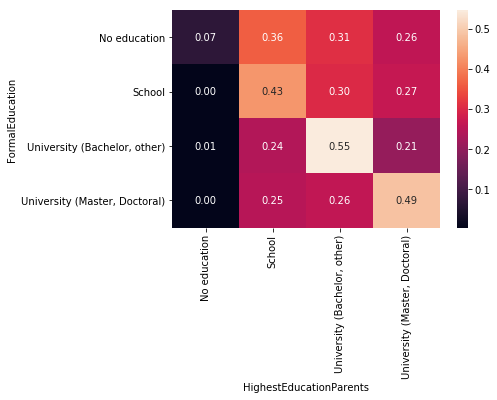

In [25]:
# plot correlation
sns.heatmap(df1, annot=True, fmt=".2f");

### Question 1 - Conclusions
The heatmap shows the correlation between the highest level of education of either of the parents and the education of the responder. 
- One can clearly see the trend on the diagonal, meaning that childen follow the footsteps of the parents.
- Examples: 
    - 50% of respondents with one of the parents having Master or PhD have similar — Master or PhD — degree.
    - The percentage for Bachelor or other University degree is 55%
    - For School education 43%.

## Question 2

Do people who choose a technical career path (developers, anlysts) have certain personal traits or preferences in common?

In [26]:
# choose columns of interest
list_of_characteristics_cols = ['ProblemSolving', 'BuildingThings', 'LearningNewTech', 
                                'UnderstandComputers', 'SeriousWork', 'KinshipDevelopers', 
                                'ChallengeMyself', 'CompetePeers', 'ChangeWorld']

In [27]:
# extract the columns of interest and inspect
df3 = df_original.copy()
df3 = df3[list_of_characteristics_cols]
df3.head()

,ProblemSolving,BuildingThings,LearningNewTech,UnderstandComputers,SeriousWork,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld
0,Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Agree
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Strongly agree,Strongly agree,Strongly agree,Disagree,Agree,Somewhat agree,Agree,Disagree,Agree
3,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# drop NaNs - we are interested only in valid entries; the number of responses is high enough that we can do that
df3 = df3.dropna(axis=0)

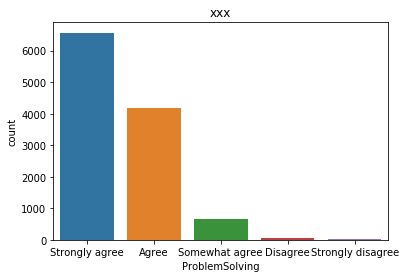

In [29]:
# testing single plot
sns.countplot(x="ProblemSolving",  data=df3).set(title='xxx');

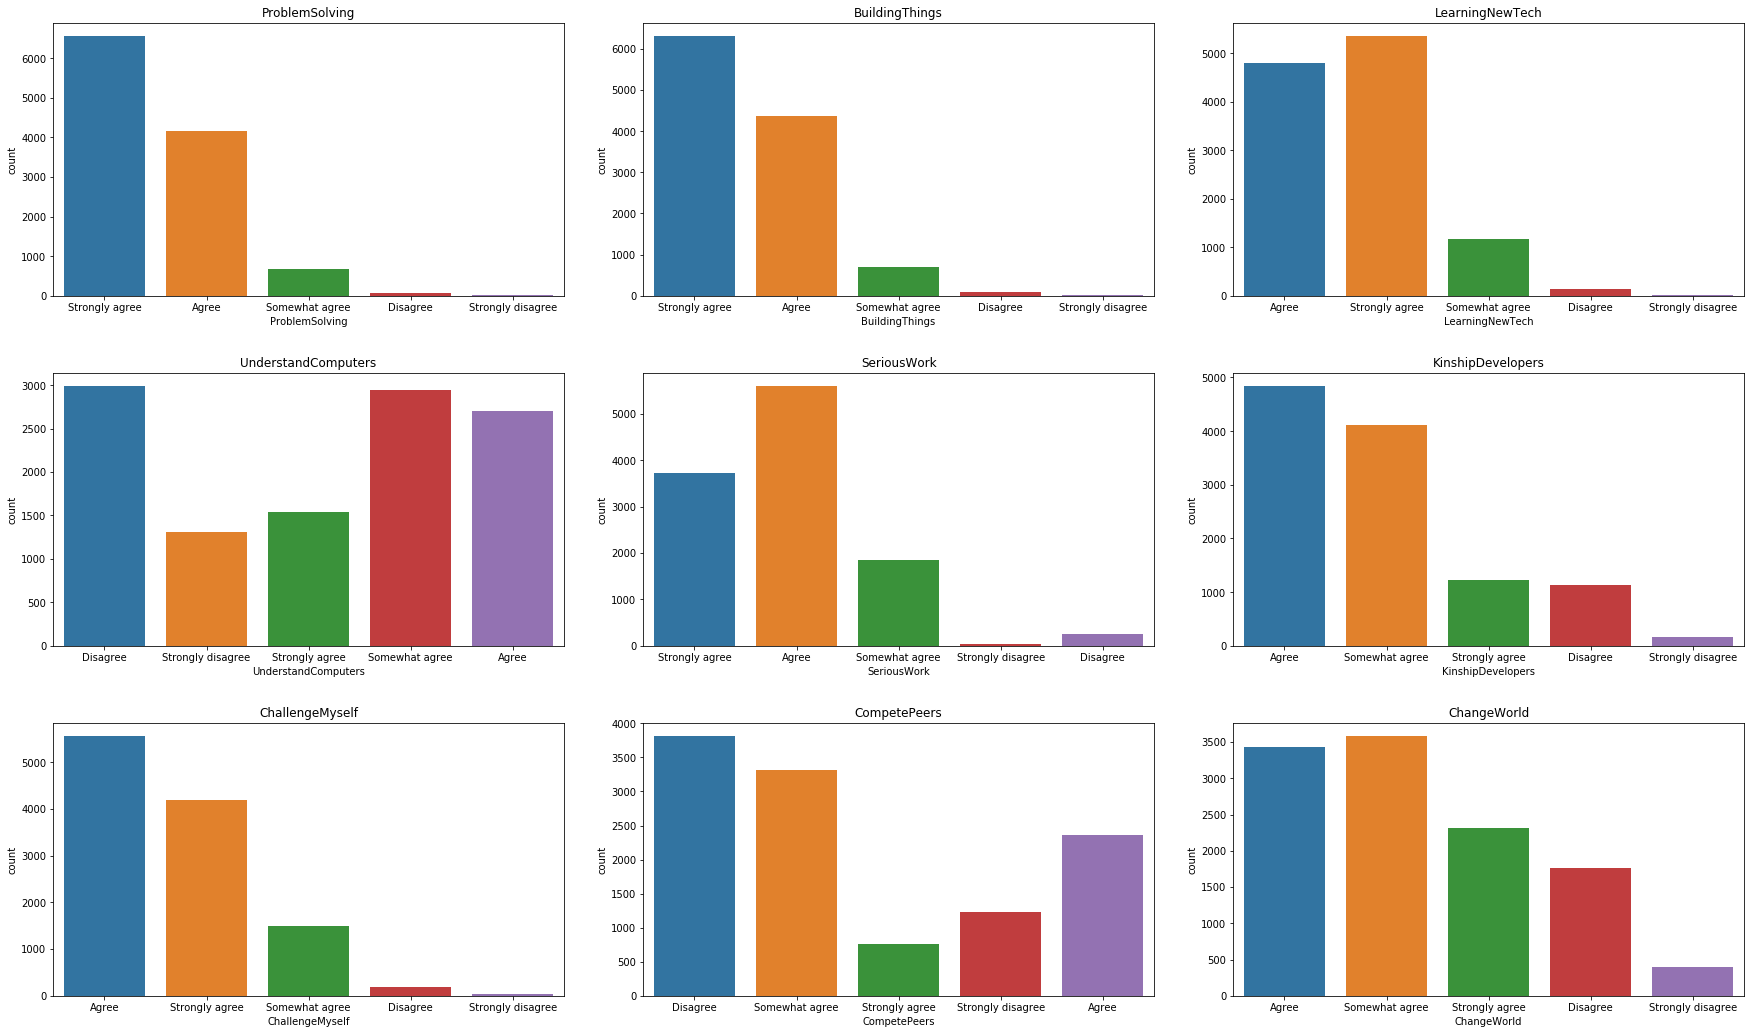

In [30]:
# plot all categorical features of interest
fig, axes = plt.subplots(3, 3, figsize = (25,15))

# create subplots and add bar charts
cc = 0
for i in range(3):
    for j in range(3):
        sns.countplot(ax=axes[i, j], x=list_of_characteristics_cols[cc],  data=df3).set(title=list_of_characteristics_cols[cc]);
        cc = cc+1

# improve the layout to prevent overlapping labels
fig.tight_layout(pad=3.0)

#### Question 2 - Conclusion
The charts above show that most of Stackoverflow’s responders like problem solving, to build things, to challenge themselves and are interested in changing the world.
Noticably, the distribution on understanding computers suggests that many responders are not interested in having such understanding.

## Question 3

Based on person's characteristics, can you predict if they enjoyed the survey?

In [31]:
# Column to predict
survey_judgement_cols = ['QuestionsInteresting']

In [32]:
# Feature columns
person_cols = ['Professional', 'ProgramHobby', 'Country', 'EmploymentStatus', 'FormalEducation', 
               'CareerSatisfaction', 'StackOverflowSatisfaction', 'StackOverflowCommunity', 
               'StackOverflowHelpful', 'StackOverflowBetter', 'Gender', 'Race']

In [33]:
# copy original df
df = df_original.copy()

In [34]:
# extract all columns of interest
df = df[person_cols+survey_judgement_cols]

In [35]:
# inspect result
df.head()

,Professional,ProgramHobby,Country,EmploymentStatus,FormalEducation,CareerSatisfaction,StackOverflowSatisfaction,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,Gender,Race,QuestionsInteresting
0,Student,"Yes, both",United States,"Not employed, and not looking for work",Secondary school,NaN,9.0,Strongly agree,Agree,Strongly agree,Male,White or of European descent,Strongly agree
1,Student,"Yes, both",United Kingdom,Employed part-time,Some college/university study without earning ...,NaN,8.0,Strongly agree,Agree,Strongly agree,Male,White or of European descent,Somewhat agree
2,Professional developer,"Yes, both",United Kingdom,Employed full-time,Bachelor's degree,8.0,8.0,Strongly agree,Agree,Agree,Male,White or of European descent,Agree
3,Professional non-developer who sometimes write...,"Yes, both",United States,Employed full-time,Doctoral degree,6.0,10.0,Strongly agree,Strongly agree,Agree,Male,White or of European descent,Agree
4,Professional developer,"Yes, I program as a hobby",Switzerland,Employed full-time,Master's degree,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# drop rows with NaNs in response column 
# we only want to account for valid entries when buildig the model 
df = df.dropna(subset=['QuestionsInteresting'], axis=0)

In [37]:
# extract response column
y = df['QuestionsInteresting']
df = df.drop(['QuestionsInteresting'], axis=1)

In [38]:
# impute the numeric columns with the mean, as this can lead to better predictive power in the ML model
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)

In [39]:
# dummy the categorical variables
# to interpret the results more easily and have different influences of each level on the response
# note that the number of columns and cathegories is small enough to avoid the issues related to dummying the categorical variables 

cat_vars = df.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
   # for each cat add dummy var, drop original column
   df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [40]:
# The features used for prediction
X = df
# inspect
df.head()

,CareerSatisfaction,StackOverflowSatisfaction,Professional_Professional developer,Professional_Professional non-developer who sometimes writes code,Professional_Student,Professional_Used to be a professional developer,"ProgramHobby_Yes, I contribute to open source projects","ProgramHobby_Yes, I program as a hobby","ProgramHobby_Yes, both",Country_Aland Islands,...,Race_Middle Eastern; White or of European descent,"Race_Native American, Pacific Islander, or Indigenous Australian","Race_Native American, Pacific Islander, or Indigenous Australian; White or of European descent",Race_South Asian,Race_South Asian; I don’t know,Race_South Asian; White or of European descent,Race_White or of European descent,Race_White or of European descent; I don’t know,Race_White or of European descent; I don’t know; I prefer not to say,Race_White or of European descent; I prefer not to say
0,7.416437,9.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,7.416437,8.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,8.000000,8.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,6.000000,10.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,7.416437,6.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
# Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=5, min_samples_leaf = 10), n_estimators = 4)
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=4, random_state=None)

In [43]:
# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_ 

In [44]:
# Predict
y_test_preds = model.predict(X_test)
y_train_preds = model.predict(X_train)

In [45]:
print("Accuracy on training data: {:.4f}".format(accuracy_score(y_train, y_train_preds)))
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, y_test_preds)))

Accuracy on training data: 0.5165
Accuracy on testing data: 0.4813


In [46]:
# display the five most important features
# which ones
indices = np.argsort(importances)[::-1]
# name of feature
columns = X_train.columns.values[indices[:5]]
# value of the weight
values = importances[indices][:5]

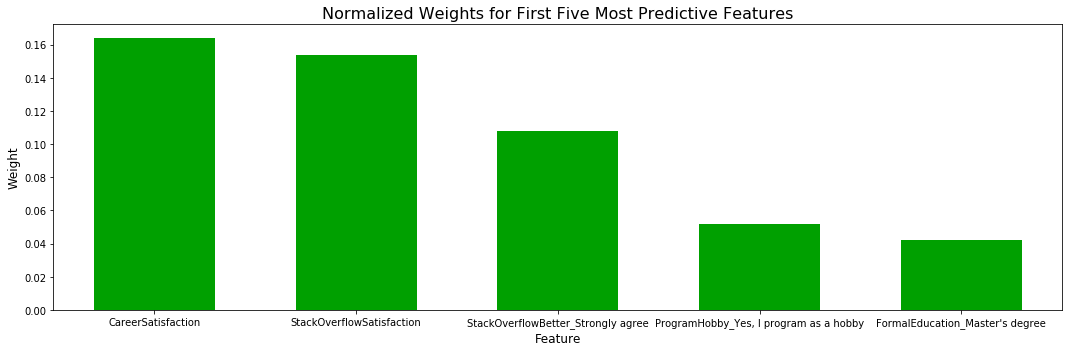

In [47]:
# Creat the plot
fig = plt.figure(figsize = (15,5))
# title
plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
# plot the weights
plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000')
# add column names
plt.xticks(np.arange(5), columns)
plt.xlim((-0.5, 4.5))
plt.ylabel("Weight", fontsize = 12)
plt.xlabel("Feature", fontsize = 12)

plt.tight_layout()
plt.show()  

In [48]:
# Inspect the values (weights) of how important the features were, to verify the plot
print(values)

[ 0.16400518  0.15359409  0.10808175  0.05187123  0.04196224]


### Question 3 - Conclusions
The features that the Adaboost ML model judged as having an effect of whether respondent would enjoy the survey’s questions are shown in the plot above. The Stackoverflow satisfaction was the feature that had the largest impact, closely followed by career satisfaction and whether the responder programs as a hobby.